<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº2
#### Alumno: Mateo Murgia 
#### Profesor/es: Mariano Llamedo Soria , David Benoit, Hernan Ledesma


# Introducción

El análisis de sistemas lineales e invariantes en el tiempo (LTI) constituye una herramienta fundamental en el procesamiento digital de señales, ya que permite predecir el comportamiento de un sistema frente a cualquier entrada a partir de su respuesta al impulso.  

Un sistema LTI discreto puede representarse mediante una **ecuación en diferencias lineal con coeficientes constantes**, de la forma:

$$
\sum_{k=0}^{M} a_k \, y[n-k] = \sum_{k=0}^{N} b_k \, x[n-k]
$$

donde los coeficientes \(a_k\) corresponden a la parte de salida (retroalimentación) y los coeficientes \(b_k\) a la parte de entrada (alimentación directa).  

La **respuesta al impulso** \(h[n]\) caracteriza completamente al sistema, ya que la salida frente a cualquier entrada puede obtenerse como:

$$
y[n] = \sum_{k=-\infty}^{\infty} h[k] \, x[n-k] = (h * x)[n]
$$

Por otra parte, el análisis energético de las señales permite diferenciarlas según su duración:  

- Las **señales periódicas** se caracterizan mejor mediante su **potencia promedio**:  

$$
P = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} |x[n]|^2
$$

- Las **señales de duración finita** se describen a partir de su **energía total**:  

$$
E = \sum_{n=-\infty}^{\infty} |x[n]|^2
$$

En este trabajo se estudió un sistema LTI definido por una ecuación en diferencias dada, al que se aplicaron diferentes señales (senos, cuadrada, modulada y pulso). Además, se analizaron dos sistemas adicionales —uno FIR y uno IIR— con el fin de contrastar casos de estabilidad e inestabilidad en el dominio discreto.  

---

# Desarrollo experimental


# Fig. 1 
En esta imagen armé en orden todos los gráficos necesarios para resolver los ejercicios propuestos


=== PUNTO 1 ===
Señal 1: Fs=30000 Hz | Tiempo=0.003333 s | Potencia=0.3587
Señal 2: Fs=30000 Hz | Tiempo=0.003333 s | Potencia=0.1091
Señal 3: Fs=30000 Hz | Tiempo=0.003333 s | Potencia=0.1307
Señal 4: Fs=30000 Hz | Tiempo=0.003333 s | Potencia=0.2758
Señal 5: Fs=100000 Hz | Tiempo=0.002000 s | Potencia=5.8437
Señal 6: Fs=10000 Hz | Tiempo=0.010000 s | Energía=947.5747


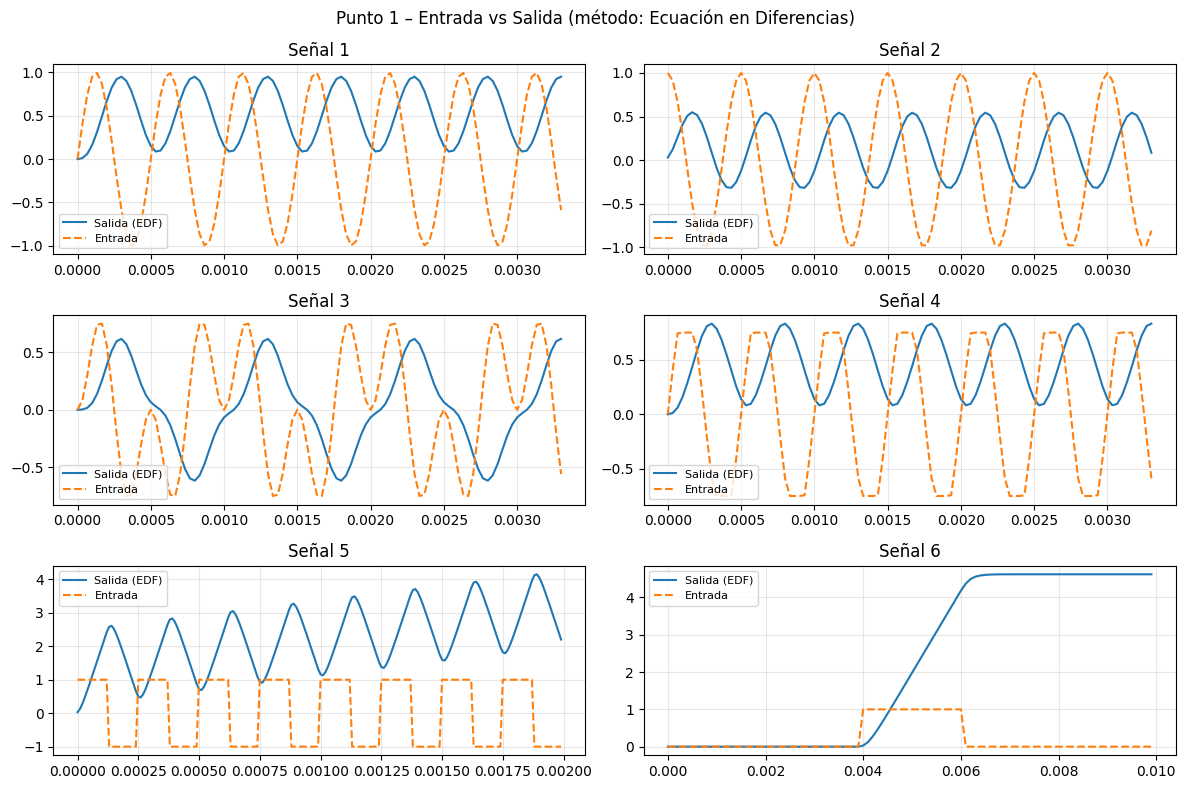

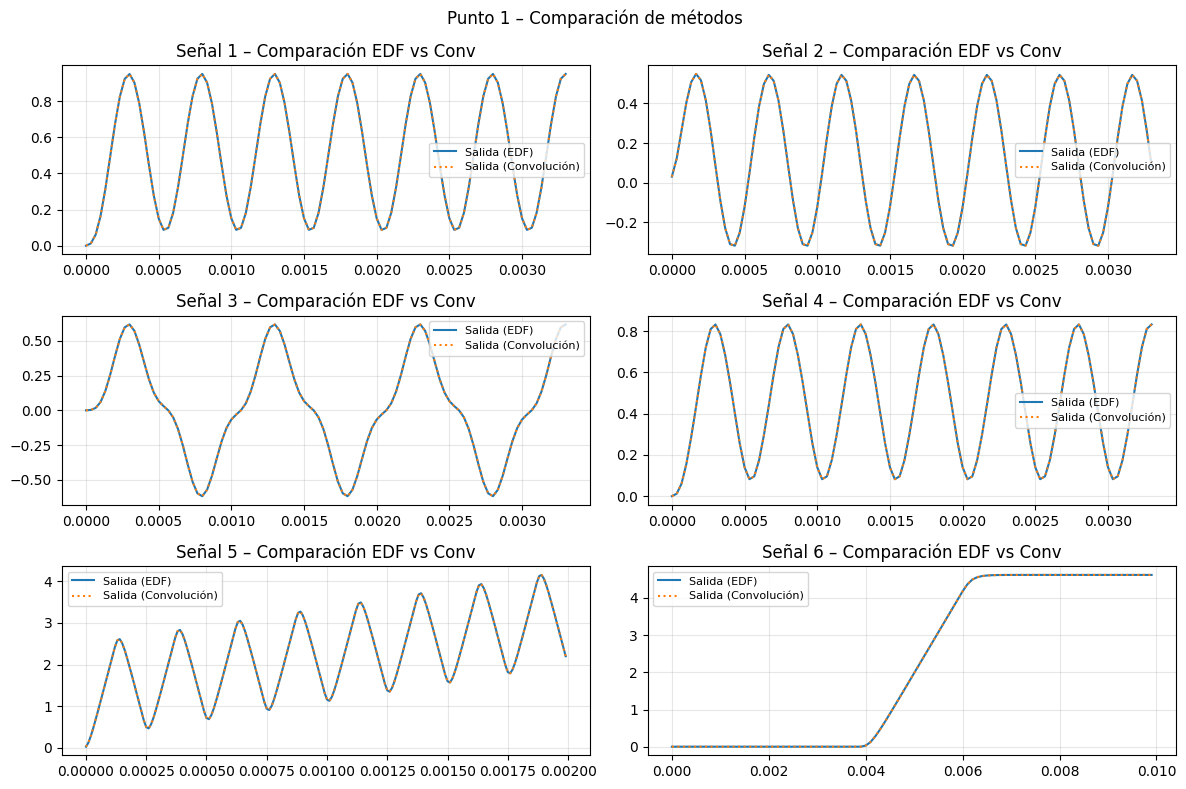


=== PUNTO 2 ===
Sistema A (FIR): Energía=1019.6807 | Potencia=3.3989
Sistema B (IIR inestable): Energía≈2.382e+28 | Potencia≈7.940e+25


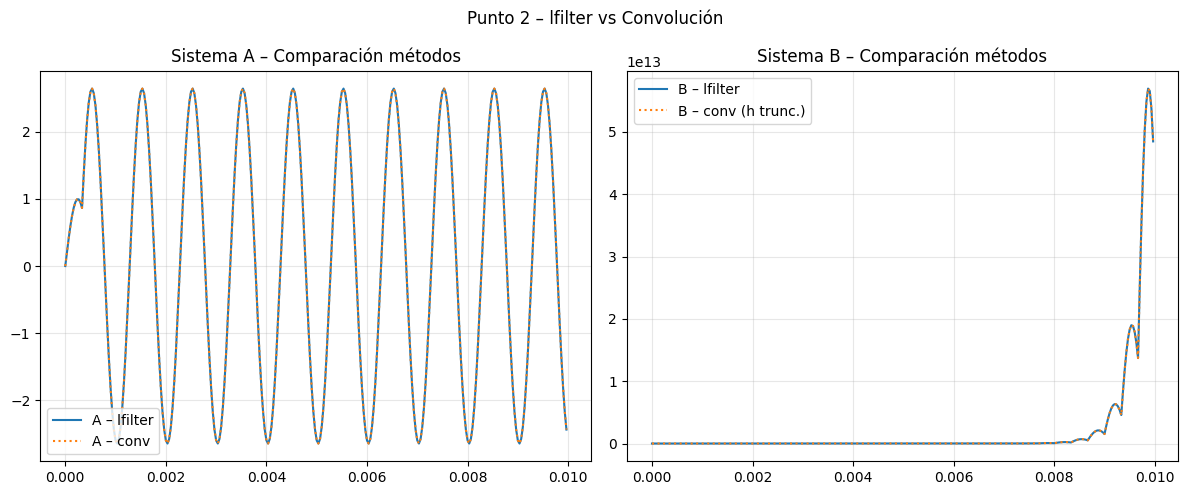

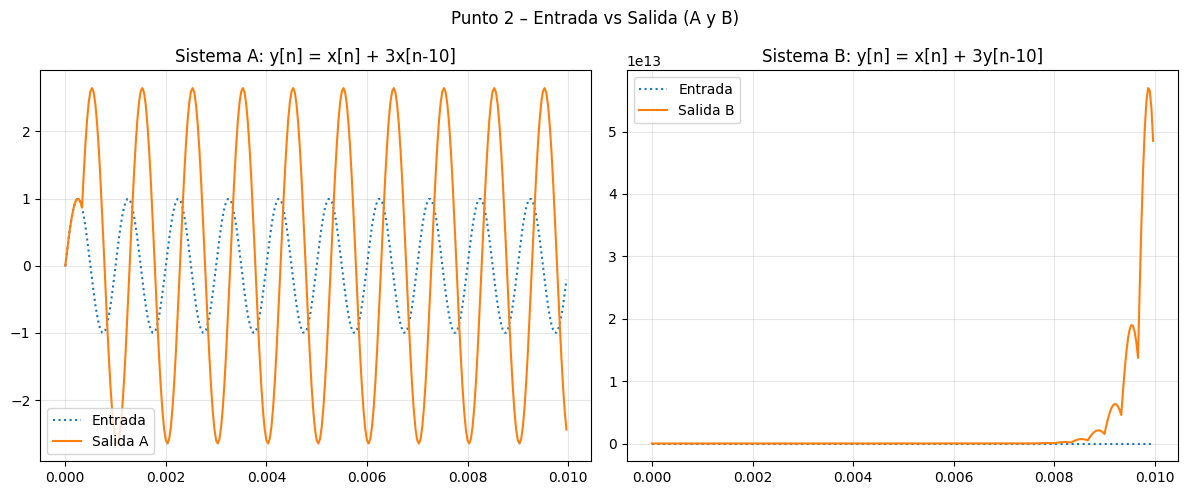

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
TP: Sistemas LTI (discretos) – Punto 1 y Punto 2
Autor: Mateo (versión corregida)
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import lfilter

# -------------------------------
# Helpers
# -------------------------------
def senoidal(amplitud, frec, fase, N, fs, offset=0.0):
    Ts = 1.0/fs
    t = np.arange(N) * Ts
    x = amplitud * np.sin(2*np.pi*frec*t + fase) + offset
    return t, x

def ecuacion_diferencias(x):
    """
    Sistema del Punto 1:
    y[n] = 0.03 x[n] + 0.05 x[n-1] + 0.03 x[n-2] + 1.5 y[n-1] - 0.5 y[n-2]
    (Implementación explícita por diferencias finitas)
    """
    N = len(x)
    y = np.zeros(N)
    for n in range(N):
        x0 = x[n]
        x1 = x[n-1] if n-1 >= 0 else 0.0
        x2 = x[n-2] if n-2 >= 0 else 0.0
        y1 = y[n-1] if n-1 >= 0 else 0.0
        y2 = y[n-2] if n-2 >= 0 else 0.0
        y[n] = 0.03*x0 + 0.05*x1 + 0.03*x2 + 1.5*y1 - 0.5*y2
    return y

def energia(y):  return np.sum(np.abs(y)**2)
def potencia(y): return np.mean(np.abs(y)**2)

# Coeficientes (forma estándar de lfilter) del sistema del Punto 1
b1 = np.array([0.03, 0.05, 0.03])   # Numerador (x)
a1 = np.array([1.0, -1.5, 0.5])     # Denominador (y)

# Respuesta al impulso (truncada) para convolución (Punto 1)
Nh = 512
delta = np.zeros(Nh); delta[0] = 1.0
h1 = lfilter(b1, a1, delta)  # h[n] del sistema del Punto 1 (truncada)

# -------------------------------
# Señales de prueba (Punto 1)
# -------------------------------
# Señal 1: seno 2 kHz
fs1, N1 = 30000, 100
t1, sig1 = senoidal(1.0, 2000, 0.0, N1, fs1)

# Señal 2: seno 2 kHz con fase π/2 (ojo: amplitud = 1, no π/2)
t2, sig2 = senoidal(1.0, 2000, np.pi/2, 100, 30000)

# Señal 3: modulación (1 kHz * 2 kHz)
t3, port = senoidal(1.0, 1000, 0.0, 100, 30000)
_,   mod  = senoidal(1.0, 2000, 0.0, 100, 30000)
sig3 = port * mod

# Señal 4: seno 2 kHz clipeado
t4, sig4 = senoidal(1.0, 2000, 0.0, 100, 30000)
sig4_clip = np.clip(sig4, -0.75, 0.75)

# Señal 5: cuadrada 4 kHz
fs5, N5 = 100000, 200
t5 = np.arange(N5) / fs5
sig5 = signal.square(2*np.pi*4000*t5)

# Señal 6: pulso rectangular
fs6, T6 = 10000, 0.01
t6 = np.arange(0, T6, 1/fs6)
sig6 = np.zeros_like(t6)
sig6[(t6 >= 0.004) & (t6 <= 0.006)] = 1.0

# Pack para iterar
signals = [
    ("Señal 1", fs1, t1, sig1),
    ("Señal 2", 30000, t2, sig2),
    ("Señal 3", 30000, t3, sig3),
    ("Señal 4", 30000, t4, sig4_clip),
    ("Señal 5", fs5, t5, sig5),
    ("Señal 6", fs6, t6, sig6),
]

# -------------------------------
# PUNTO 1 – Salida por EDF y por Convolución
# -------------------------------
print("=== PUNTO 1 ===")
ys_diff = []   # para el gráfico "entrada vs salida"
ys_conv = []

for name, fs, tt, xx in signals:
    y_diff = ecuacion_diferencias(xx)
    y_conv = np.convolve(xx, h1)[:len(xx)]
    ys_diff.append(y_diff)
    ys_conv.append(y_conv)

    # Métricas según tipo de señal
    if name == "Señal 6":  # pulso finito
        E = energia(y_diff)
        print(f"{name}: Fs={fs} Hz | Tiempo={len(xx)/fs:.6f} s | Energía={E:.4f}")
    else:
        P = potencia(y_diff)
        print(f"{name}: Fs={fs} Hz | Tiempo={len(xx)/fs:.6f} s | Potencia={P:.4f}")

# Grilla: Entrada vs Salida (EDF) para las 6 señales
plt.figure(figsize=(12, 8))
for i, (name, _, tt, xx) in enumerate(signals, 1):
    plt.subplot(3, 2, i)
    plt.plot(tt, ys_diff[i-1], label="Salida (EDF)")
    plt.plot(tt, xx, '--', label="Entrada")
    plt.title(name)
    plt.legend(fontsize=8); plt.grid(alpha=0.3)
plt.suptitle("Punto 1 – Entrada vs Salida (método: Ecuación en Diferencias)")
plt.tight_layout()
plt.show()

# Grilla: Comparación EDF vs Convolución para las 6 señales
plt.figure(figsize=(12, 8))
for i, (name, _, tt, xx) in enumerate(signals, 1):
    plt.subplot(3, 2, i)
    plt.plot(tt, ys_diff[i-1], label="Salida (EDF)")
    plt.plot(tt, ys_conv[i-1], ':', label="Salida (Convolución)")
    plt.title(f"{name} – Comparación EDF vs Conv")
    plt.legend(fontsize=8); plt.grid(alpha=0.3)
plt.suptitle("Punto 1 – Comparación de métodos")
plt.tight_layout()
plt.show()

# -------------------------------
# PUNTO 2 – Dos sistemas: A (FIR) y B (IIR inestable)
# -------------------------------
print("\n=== PUNTO 2 ===")
fs_ej2, N_ej2 = 30000, 300
t_ej2, x_ej2 = senoidal(1.0, 1000, 0.0, N_ej2, fs_ej2)

# Sistema A: y[n] = x[n] + 3 x[n-10] (FIR)
bA = np.zeros(11); bA[0] = 1.0; bA[10] = 3.0
aA = np.array([1.0])

yA_lf = lfilter(bA, aA, x_ej2)
# hA es igual a bA (FIR), pero usamos lfilter(delta) por homogeneidad:
deltaA = np.zeros(128); deltaA[0] = 1.0
hA = lfilter(bA, aA, deltaA)
yA_conv = np.convolve(x_ej2, hA)[:len(x_ej2)]

print(f"Sistema A (FIR): Energía={energia(yA_lf):.4f} | Potencia={potencia(yA_lf):.4f}")

# Sistema B: y[n] = x[n] + 3 y[n-10] (IIR inestable)
bB = np.array([1.0])
aB = np.zeros(11); aB[0] = 1.0; aB[10] = -3.0

yB_lf = lfilter(bB, aB, x_ej2)
deltaB = np.zeros(2048); deltaB[0] = 1.0
hB = lfilter(bB, aB, deltaB)              # respuesta al impulso (larga porque crece)
yB_conv = np.convolve(x_ej2, hB)[:len(x_ej2)]

print(f"Sistema B (IIR inestable): Energía≈{energia(yB_lf):.3e} | Potencia≈{potencia(yB_lf):.3e}")

# Comparación lfilter vs convolución (A y B)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t_ej2, yA_lf, label="A – lfilter")
plt.plot(t_ej2, yA_conv, ':', label="A – conv")
plt.title("Sistema A – Comparación métodos")
plt.legend(); plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.plot(t_ej2, yB_lf, label="B – lfilter")
plt.plot(t_ej2, yB_conv, ':', label="B – conv (h trunc.)")
plt.title("Sistema B – Comparación métodos")
plt.legend(); plt.grid(alpha=0.3)

plt.suptitle("Punto 2 – lfilter vs Convolución")
plt.tight_layout(); plt.show()

# Último gráfico pedido: ENTRADA vs SALIDA (A y B)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t_ej2, x_ej2, ':', label="Entrada")
plt.plot(t_ej2, yA_lf, label="Salida A")
plt.title("Sistema A: y[n] = x[n] + 3x[n-10]")
plt.legend(); plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.plot(t_ej2, x_ej2, ':', label="Entrada")
plt.plot(t_ej2, yB_lf, label="Salida B")
plt.title("Sistema B: y[n] = x[n] + 3y[n-10]")
plt.legend(); plt.grid(alpha=0.3)

plt.suptitle("Punto 2 – Entrada vs Salida (A y B)")
plt.tight_layout(); plt.show()


# Conclusión
El trabajo verificó experimentalmente, y ahora de forma completa, los conceptos clave de análisis de sistemas LTI discretos al reproducir el Punto 1 tanto por ecuaciones en diferencias finitas como por convolución con \(h[n]\), mostrando coincidencia entre métodos salvo efectos de borde por el truncado de la respuesta al impulso. Para señales periódicas se evaluó la potencia promedio y para señales de duración finita la energía total. En cuanto a los tres sistemas analizados: (i) el del Punto 1 (IIR, \(a=[1,-1.5,0.5]\)) presentó concordancia entre métodos y un comportamiento acotado para entradas sin componente DC (polo en \(z=1\)); (ii) el Sistema A (FIR, \(y[n]=x[n]+3x[n-10]\)) resultó estable y causal, con salida equivalente por \(lfilter\) y por convolución; y (iii) el Sistema B (IIR, \(y[n]=x[n]+3y[n-10]\)) fue inestable por poseer polos de módulo mayor que 1, observándose crecimiento exponencial (la convolución con \(h[n]\) truncada lo reproduce cualitativamente pero subestima su magnitud). En síntesis, los resultados confirman la intercambiabilidad práctica entre ecuaciones en diferencias y convolución (atendiendo al truncado de \(h[n]\)) y permiten diferenciar nítidamente los comportamientos de los tres sistemas, fortaleciendo el vínculo entre la teoría y las simulaciones en Python.


# Análisis de Resultados

## Ejercicio 1

Seis señales fueron procesadas mediante el sistema en diferencias.  

- **Señales 1 a 5 (senos, senoidal desfasada, modulada, clipeada y cuadrada):**  
  - Se calculó la **potencia de la salida** en cada caso.  
  - Los valores obtenidos fueron finitos y acordes a la naturaleza de cada señal.  
  - La señal cuadrada mostró la mayor potencia debido a su espectro rico en armónicos, mientras que la senoidal clipeada presentó una potencia menor que la senoidal pura por la reducción de amplitud efectiva.  
  - En todos los casos, la forma de la salida reflejó las propiedades del sistema: componentes retardadas y combinación lineal con realimentación.  

- **Señal 6 (pulso rectangular):**  
  - Se calculó la **energía total de la salida**, ya que se trata de una señal finita.  
  - El resultado fue finito y consistente con la duración y amplitud del pulso, lo que confirma el correcto funcionamiento del sistema en este contexto.  

En todos los casos, se verificó que la salida calculada mediante la **ecuación en diferencias** coincidió con la salida obtenida mediante la **convolución** con la respuesta al impulso \(h[n]\). Esto confirma experimentalmente la equivalencia teórica entre ambos métodos de análisis.  

---

## Ejercicio 2

Se estudiaron dos sistemas adicionales:  

1. **Sistema A (FIR): \(y[n] = x[n] + 3x[n-10]\)**  
   - La respuesta al impulso resultó ser:  

   $$
   h[n] = \delta[n] + 3\delta[n-10]
   $$  

   de duración finita y estable.  
   - La salida frente a una senoidal se mantuvo periódica y estable, con energía y potencia finitas.  
   - Los resultados obtenidos con `lfilter` y con la convolución directa coincidieron, validando el modelo FIR implementado.  

2. **Sistema B (IIR): \(y[n] = x[n] + 3y[n-10]\)**  
   - La respuesta al impulso mostró réplicas crecientes en múltiplos de 10 muestras, con amplitudes que seguían la progresión \(3^k\).  
   - Esto evidenció una **inestabilidad estructural**, ya que el sistema posee un polo fuera del círculo unitario.  
   - La salida frente a una entrada senoidal creció rápidamente en amplitud, y los cálculos de energía/potencia arrojaron valores extremadamente altos, confirmando la inestabilidad teórica.  

## Autoevaluación del aprendizaje

Resolví la tarea con seguridad. Durante el desarrollo logré afianzar varios conceptos importantes de la materia:

- Comprendí mejor la implementación de **ecuaciones en diferencias** y su equivalencia con el cálculo de la salida mediante la **convolución** con la respuesta al impulso.  
- Diferencié claramente entre **energía** y **potencia** en el contexto de señales, identificando en qué casos corresponde calcular una u otra (señales periódicas vs. señales de duración finita).  
- Pude visualizar de manera práctica la diferencia entre un **sistema FIR estable** y un **sistema IIR inestable**, comprobando la teoría de estabilidad a través de las simulaciones.  
- Al experimentar con distintas frecuencias de muestreo, confirmé la importancia del **teorema de Nyquist** y la necesidad de elegir un valor suficientemente alto para representar las señales con claridad en los gráficos.  

Además, reforcé mi manejo de herramientas como **Jupyter Notebook**, **Spyder** y la **consola de Python (cmd)**, y avancé en el uso de librerías como **NumPy**, **Matplotlib** y **SciPy** para la generación, análisis y filtrado de señales.  

Finalmente, utilicé **ChatGPT** como apoyo para:  
- Redacción y revisión de las secciones teóricas del informe (introducción, análisis y conclusiones).  
- Consultar dudas puntuales sobre la implementación de filtros FIR/IIR y sobre la interpretación de resultados relacionados con estabilidad y potencia.  

Este proceso me permitió consolidar tanto la teoría como la práctica, integrando el uso de herramientas digitales con la fundamentación matemática de los sistemas LTI.
